In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Création du dataframe

In [3]:
df = pd.DataFrame({
    'Maths':[6,8,6,14.5,14,11,5.5,13,9],
    'Sciences':[6,8,7,14.5,14,10,7,12.5,9.5],
    'Francais':[5,8,11,15.5,12,5.5,14,8.5,12.5],
    'Latin':[5.5,8,9.5,15,12,7,11.5,9.5,12],
    'Musique':[8,9,11,8,10,13,10,12,18]
})

In [4]:
# On veut renomer les indices des lignes par des noms d'étudiants
df.index = ['Jean', 'Jacques', 'Aline', 'Emeline','Antoine', 'Jules','Chloé','Jeanne','Béatrice']
df

,Maths,Sciences,Francais,Latin,Musique
Jean,6.0,6.0,5.0,5.5,8
Jacques,8.0,8.0,8.0,8.0,9
Aline,6.0,7.0,11.0,9.5,11
Emeline,14.5,14.5,15.5,15.0,8
Antoine,14.0,14.0,12.0,12.0,10
Jules,11.0,10.0,5.5,7.0,13
Chloé,5.5,7.0,14.0,11.5,10
Jeanne,13.0,12.5,8.5,9.5,12
Béatrice,9.0,9.5,12.5,12.0,18


In [5]:
X = df.values
print(X)

[[ 6.   6.   5.   5.5  8. ]
 [ 8.   8.   8.   8.   9. ]
 [ 6.   7.  11.   9.5 11. ]
 [14.5 14.5 15.5 15.   8. ]
 [14.  14.  12.  12.  10. ]
 [11.  10.   5.5  7.  13. ]
 [ 5.5  7.  14.  11.5 10. ]
 [13.  12.5  8.5  9.5 12. ]
 [ 9.   9.5 12.5 12.  18. ]]


In [6]:
X=2*X
X

array([[12., 12., 10., 11., 16.],
       [16., 16., 16., 16., 18.],
       [12., 14., 22., 19., 22.],
       [29., 29., 31., 30., 16.],
       [28., 28., 24., 24., 20.],
       [22., 20., 11., 14., 26.],
       [11., 14., 28., 23., 20.],
       [26., 25., 17., 19., 24.],
       [18., 19., 25., 24., 36.]])

In [7]:
df

,Maths,Sciences,Francais,Latin,Musique
Jean,6.0,6.0,5.0,5.5,8
Jacques,8.0,8.0,8.0,8.0,9
Aline,6.0,7.0,11.0,9.5,11
Emeline,14.5,14.5,15.5,15.0,8
Antoine,14.0,14.0,12.0,12.0,10
Jules,11.0,10.0,5.5,7.0,13
Chloé,5.5,7.0,14.0,11.5,10
Jeanne,13.0,12.5,8.5,9.5,12
Béatrice,9.0,9.5,12.5,12.0,18


## On centre et réduit les données


In [8]:
# Import
from sklearn.preprocessing import StandardScaler

In [9]:
# Centrer et réduire les données
Z = StandardScaler().fit_transform(X)
print(Z)

[[-1.08650256 -1.28173989 -1.50366322 -1.62520902 -1.01904933]
 [-0.4938648  -0.61300603 -0.63985669 -0.72231512 -0.67936622]
 [-1.08650256 -0.94737296  0.22394984 -0.18057878  0.        ]
 [ 1.43220792  1.560379    1.51965963  1.8057878  -1.01904933]
 [ 1.28404848  1.39319553  0.51188535  0.72231512 -0.33968311]
 [ 0.39509184  0.05572782 -1.35969546 -1.08347268  0.67936622]
 [-1.234662   -0.94737296  1.08775637  0.54173634 -0.33968311]
 [ 0.9877296   0.89164514 -0.49588893 -0.18057878  0.33968311]
 [-0.19754592 -0.11145564  0.65585311  0.72231512  2.37778177]]


In [10]:
# On vérifie que les moyennes sont bien à 0 et les écarts-types à 1
print(np.mean(Z,axis=0))
print(np.std(Z,axis=0))

[ 1.81953218e-16 -2.20502629e-16  2.34380416e-16 -1.23358114e-17
  4.93432455e-17]
[1. 1. 1. 1. 1.]


## On effectue l'ACP

In [43]:
# Import
from sklearn.decomposition import PCA

# Instanciation puis effectuation de l'ACP avec la méthode SVD Décomposition en valeurs singulières 
acp = PCA(svd_solver='full')
# on récupère les coordonnées factorielles dans la matrice coord
coord = acp.fit_transform(Z)

# Nombre de composantes calculées
n = (acp.n_components_)
print(n)
coord

5


array([[-2.78571626, -0.6764554 , -0.73680069,  0.04824298, -0.0332307 ],
       [-1.26249031, -0.33033839, -0.55495038,  0.03576028,  0.01091186],
       [-1.01674674,  1.01982862, -0.28808844, -0.06237732,  0.00743856],
       [ 3.12214541, -0.16584307, -1.14426837,  0.10012136,  0.00532702],
       [ 1.95510007, -0.78790499, -0.18921203, -0.09873943, -0.01278293],
       [-0.9477522 , -1.20140468,  1.14011052,  0.01857612,  0.04027278],
       [-0.32496763,  1.75473914, -0.90951345, -0.04309011,  0.01406045],
       [ 0.63734131, -1.12985744,  0.69185868, -0.05383744, -0.01383015],
       [ 0.62308636,  1.51723621,  1.99086415,  0.05534356, -0.01816687]])

In [54]:
N=9
corvar=np.matmul(Z,np.transpose(Z))/N
vp=np.linalg.eig(corvar)
vps=vp[0]#valeur propre
vps=-np.sort(-vps)#valeur propre decroissant 
vpsum=(vps[0]+vps[1])/sum(vps)#pourcentage 2 plus grande internie
vpm=vp[1]#vector propre
vpt=np.argsort(corvar)

In [57]:
vpm

array([[ 0.5489018 ,  0.21020373,  0.2476971 , -0.25628517, -0.53826899,
         0.13861231,  0.13223905,  0.45561078, -0.15332045],
       [ 0.24876302,  0.10265032,  0.1865628 , -0.18997232,  0.17674965,
         0.045291  , -0.45579917, -0.06467647,  0.18857127],
       [ 0.20034134, -0.31690453,  0.09684935,  0.33137224,  0.12048931,
        -0.05399696, -0.09512171,  0.27958173, -0.82927499],
       [-0.61519231,  0.05153456,  0.38467928, -0.53188304,  0.08628674,
         0.2072635 ,  0.15320954,  0.29144706, -0.31808587],
       [-0.38523591,  0.2448359 ,  0.06360916,  0.52454168, -0.20705721,
        -0.26056557, -0.44067488,  0.49336293, -0.00346737],
       [ 0.18674655,  0.373328  , -0.3832815 , -0.09868348,  0.65233622,
         0.11038633,  0.09862179,  0.46829404, -0.14174742],
       [ 0.06403212, -0.54527277,  0.30575955,  0.22891118,  0.22775041,
         0.5147688 ,  0.40157139,  0.27007971,  0.35834565],
       [-0.12558271,  0.35109521, -0.23258853,  0.28600511, -0

In [51]:
coord1=np.matmul(vpm,Z)
print(coord1)

[[-1.65573395 -1.91110654 -1.94050492 -2.21180206 -0.41870534]
 [-0.08928507 -0.25305132 -0.99780733 -0.87561529  0.42232163]
 [ 0.99899805  0.95947957 -0.22410717 -0.0712724  -2.24871454]
 [-0.18253527 -0.15551046 -0.25419966 -0.42896726  0.53603138]
 [ 1.64304504  1.65669123  0.75600132  1.18739482 -0.10594607]
 [ 1.13785591  0.99581662 -0.78956272 -0.46408306 -0.70143491]
 [ 0.39135443  0.48612838  0.62351327  0.68232778  1.15167205]
 [-0.17519643 -0.29422085 -0.13225096 -0.16083951 -0.10137002]
 [ 0.76956826  0.59864317 -0.6546254  -0.30347454  0.8984351 ]]


In [12]:
print(acp)

PCA(svd_solver='full')


In [13]:
# Récupérer les valeurs propres / variance / inertie
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement 
print(eigval)

[2.86181753e+00 1.15068113e+00 9.83140738e-01 3.93712053e-03
 4.23484620e-04]


In [14]:
# Vérifier que la somme des valeurs propres est bien égale au nombre de variables
print(np.sum(eigval,axis=0))

4.999999999999998


In [15]:
# Ratio de réprésentation des valeurs propres
# ou pourcentage d'inertie expliquée par chaque axe
print(acp.explained_variance_ratio_)

[5.72363506e-01 2.30136226e-01 1.96628148e-01 7.87424105e-04
 8.46969241e-05]


## Détermination du nombre de facteurs à retenir

 __1. Scree plot : éboulis des valeurs propres__

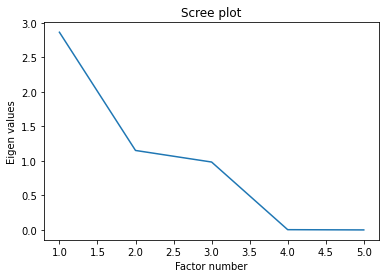

In [16]:
# Scree plot : éboulis des valeurs propres
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

__2. Cumul de variance expliquée__

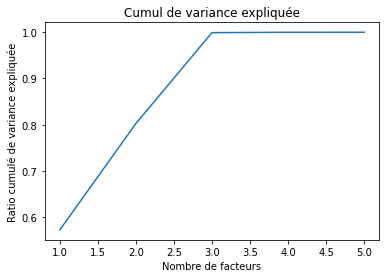

In [17]:
# Cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Cumul de variance expliquée")
plt.ylabel("Ratio cumulé de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()

__3. Test des bâtons brisés :__

Les seuils sont définis par :
$$b_{k}=\sum_{m=k}^{p}\frac{1}{m}$$

Le facteur numéro k est validé si ($\lambda_{k} > b_{k}$), où $\lambda_{k}$ est la valeur propre associé à l'axe k.

In [18]:
# Test des bâtons brisés
m = 1/np.arange(n,0,-1)
bk = np.cumsum(m)
bk = bk[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

   Val.Propre    Seuils
0    2.861818  2.283333
1    1.150681  1.283333
2    0.983141  0.783333
3    0.003937  0.450000
4    0.000423  0.200000


In [19]:
# Ou alors, une façon plus basique de calculer les seuils
bk=[0]*n
for i in range(1,n+1):
  bk[i-1]=0
  for j in range(i,n+1):
    bk[i-1]=bk[i-1]+(1/j)
    
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

   Val.Propre    Seuils
0    2.861818  2.283333
1    1.150681  1.283333
2    0.983141  0.783333
3    0.003937  0.450000
4    0.000423  0.200000


**Que suggère le critère de Kaiser ?**

In [20]:
nb_composante=0
for valeur_propre in eigval:
  if valeur_propre > 1:
    nb_composante=nb_composante+1
print("le nombre de dimension retenues est : ", nb_composante)


le nombre de dimension retenues est :  2


**Que suggère le critère de Karlis – Saporta - Spinaki (2003) ?** [lien de l'article scientifique](https://www.tandfonline.com/doi/full/10.1081/STA-120018556)

In [21]:
seuil=1+2*np.sqrt((5-1)/(9-1))
print("le seuil est de : ",seuil)
nb_composante=0
for valeur_propre in eigval:
  if valeur_propre > seuil:
    nb_composante=nb_composante+1
print("le nombre de dimension retenues est : ", nb_composante)

le seuil est de :  2.414213562373095
le nombre de dimension retenues est :  1


## Représentation des individus

Les coordonnées factorielles des individus ont été collectées dans la variable coord. Nous les positionnons dans le premier plan factoriel avec leurs labels.

[[-2.78571626 -0.6764554  -0.73680069  0.04824298 -0.0332307 ]
 [-1.26249031 -0.33033839 -0.55495038  0.03576028  0.01091186]
 [-1.01674674  1.01982862 -0.28808844 -0.06237732  0.00743856]
 [ 3.12214541 -0.16584307 -1.14426837  0.10012136  0.00532702]
 [ 1.95510007 -0.78790499 -0.18921203 -0.09873943 -0.01278293]
 [-0.9477522  -1.20140468  1.14011052  0.01857612  0.04027278]
 [-0.32496763  1.75473914 -0.90951345 -0.04309011  0.01406045]
 [ 0.63734131 -1.12985744  0.69185868 -0.05383744 -0.01383015]
 [ 0.62308636  1.51723621  1.99086415  0.05534356 -0.01816687]]


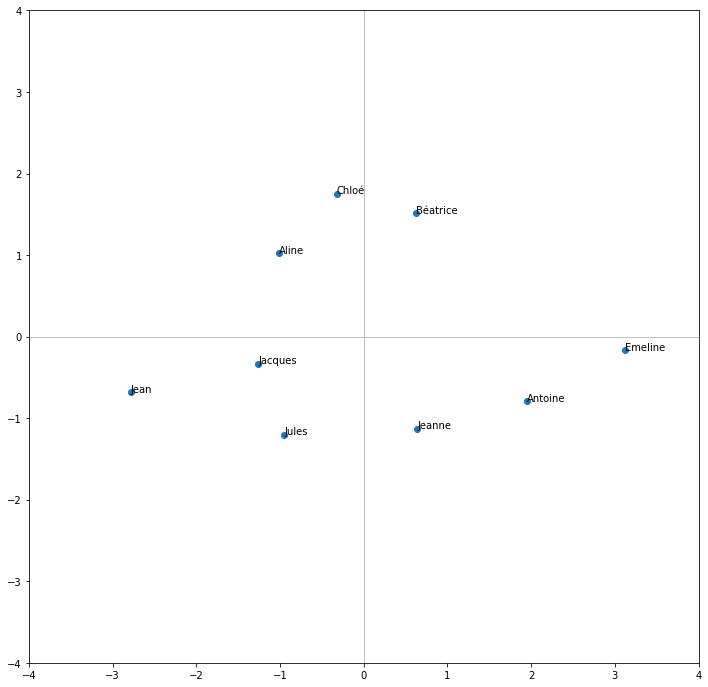

In [45]:
print(coord)
df.index = ['Jean', 'Jacques', 'Aline', 'Emeline','Antoine', 'Jules','Chloé','Jeanne','Béatrice']
# Création du graphique 
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-4,4) 
ax.set_ylim(-4,4) 

# Placement des points
plt.scatter(coord[:,0],coord[:,1])

# Placement des étiquettes des observations
for i in range(len(Z)):
     plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
# Ajout Des axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

# Affichage
plt.show()

__Contribution des individus dans l'inertie totale__

Ceci correspond aux carrés des distances à l’origine des individus :

$$d_{i}^{2}=\sum_{k=1}^{p}F_{ik}^{2}$$

tel que $F_{ik}$ représente les coordonnées dans le plan factoriel de l'individu $i$ dans l'axe $k$ (que nous avons récupéré dans la variable coord)

In [23]:
# Contributions des individus dans l'inertie totale
# elles représentent les carrés des distances à l’origine des individus
di2 = np.sum(coord**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di2}))

         ID        d_i
0      Jean   8.764114
1   Jacques   2.012373
2     Aline   2.160766
3   Emeline  11.094699
4   Antoine   4.488925
5     Jules   3.643426
6     Chloé   4.013983
7    Jeanne   2.164540
8  Béatrice   6.657175


__Qualité de représentation des individus__

$COS^{2}_{ik}$ la qualité de représentation de l'individu i sur l'axe k est calculé comme suit :

$$COS_{ik}^{2}=\frac{F_{ik}^{2}}{d_{i}^{2}}$$

tel que $F_{ik}$ représente les coordonnées dans le plan factoriel de l'individu $i$ dans l'axe $k$ (que nous avons récupéré dans la variable coord), et $d_{i}^{2}$ represente le carré des distances à l'origines de l'individu $i$ (calculé ci dessus).

In [24]:
# Qualité de représentation des individus - COS2
COS2 = coord**2
# On calcule la qualité de représentation des individus sur chacun des 5 axes
for j in range(5):
     COS2[:,j] = COS2[:,j]/di2
# On l'affiche pour les deux principaux axes
print(pd.DataFrame({'id':df.index,'COS^2_1':COS2[:,0],'COS^2_2':COS2[:,1]}))

         id   COS^2_1   COS^2_2
0      Jean  0.885453  0.052212
1   Jacques  0.792041  0.054226
2     Aline  0.478429  0.481334
3   Emeline  0.878599  0.002479
4   Antoine  0.851522  0.138295
5     Jules  0.246536  0.396158
6     Chloé  0.026309  0.767096
7    Jeanne  0.187663  0.589769
8  Béatrice  0.058319  0.345793


In [25]:
# Vérifions que chaque individu est réprésenté à 100 % si l'on considère tous les axes
# donc la somme en ligne des cos2 = 1
print(np.sum(COS2,axis=1))
print(len(np.sum(COS2,axis=1)))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
9


__Contribution des individus aux axes__

Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur.

$CTR_{ik}$ la contribution de l'individu $i$ à la construction de l'axe $k$ est calculée comme suit :

$$CTR_{ik}=\frac{F_{ik}^{2}}{n\times\lambda_{k}}$$

tel que $F_{ik}$ représente les coordonnées dans le plan factoriel de l'individu $i$ dans l'axe $k$ (que nous avons récupéré dans la variable coord), $\lambda_{k}$ represente la valeur propre associée à l'axe $k$, et n est le nombre d'individus.



In [26]:
# Contributions des varibles aux axes
CTR = coord**2
for j in range(5):
  CTR[:,j] = CTR[:,j]/(9*eigval[j])
print(pd.DataFrame({'id':df.index,'CTR_1':CTR[:,0],'CTR_2':CTR[:,1]}))

         id     CTR_1     CTR_2
0      Jean  0.301293  0.044186
1   Jacques  0.061883  0.010537
2     Aline  0.040137  0.100428
3   Emeline  0.378462  0.002656
4   Antoine  0.148407  0.059945
5     Jules  0.034874  0.139374
6     Chloé  0.004100  0.297322
7    Jeanne  0.015771  0.123268
8  Béatrice  0.015073  0.222284


In [27]:
# En pratique: on retient pour l’interprétation les individus dont la contribution est > à la contribution moyenne (>1/n)

In [28]:
# Vérifions que en considérant tous les individus à la fois la contribution à chaque axe est de 100 %
print(np.sum(CTR,axis=0))

[1. 1. 1. 1. 1.]


## Représentation des variables

In [29]:
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
# on récupère le champ components_ de l'objet ACP 
# Attention acp.components retourne la matrice des vecteurs propres facteurs x variables
# il faut la transposer pour avoir la matrice des vecteurs propres variables x facteurs  
vp_mat=acp.components_.T
print(vp_mat)
print(np.sum(vp_mat**2,axis=1))
print(np.sum(vp_mat**2,axis=0))

[[ 0.47639106 -0.53263677  0.15475344  0.30298298  0.61123017]
 [ 0.53024454 -0.40159625  0.09364365 -0.51679947 -0.53076393]
 [ 0.44812425  0.56963554 -0.22763607 -0.47749743  0.44144992]
 [ 0.53807342  0.37055187 -0.10934894  0.64155887 -0.38679883]
 [ 0.03941992  0.305328    0.95052978 -0.03896199  0.01399912]]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


In [30]:
# On calcule la racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [31]:
# Corrélation des variables avec les axes
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

# Afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 8.05906345e-01 -5.71358428e-01  1.53443384e-01  1.90111148e-02
   1.25783479e-02]
 [ 8.97009779e-01 -4.30791517e-01  9.28509134e-02 -3.24273469e-02
  -1.09224539e-02]
 [ 7.58087638e-01  6.11046939e-01 -2.25709026e-01 -2.99612823e-02
   9.08448392e-03]
 [ 9.10253819e-01  3.97490271e-01 -1.08423247e-01  4.02555596e-02
  -7.95983325e-03]
 [ 6.66863115e-02  3.27524758e-01  9.42483108e-01 -2.44472750e-03
   2.88084323e-04]]


In [52]:
print(vp_mat)

[[ 0.47639106 -0.53263677  0.15475344  0.30298298  0.61123017]
 [ 0.53024454 -0.40159625  0.09364365 -0.51679947 -0.53076393]
 [ 0.44812425  0.56963554 -0.22763607 -0.47749743  0.44144992]
 [ 0.53807342  0.37055187 -0.10934894  0.64155887 -0.38679883]
 [ 0.03941992  0.305328    0.95052978 -0.03896199  0.01399912]]


In [53]:
print(vpm)

[[ 0.5489018   0.21020373  0.2476971  -0.25628517 -0.53826899  0.13861231
   0.13223905  0.45561078 -0.15332045]
 [ 0.24876302  0.10265032  0.1865628  -0.18997232  0.17674965  0.045291
  -0.45579917 -0.06467647  0.18857127]
 [ 0.20034134 -0.31690453  0.09684935  0.33137224  0.12048931 -0.05399696
  -0.09512171  0.27958173 -0.82927499]
 [-0.61519231  0.05153456  0.38467928 -0.53188304  0.08628674  0.2072635
   0.15320954  0.29144706 -0.31808587]
 [-0.38523591  0.2448359   0.06360916  0.52454168 -0.20705721 -0.26056557
  -0.44067488  0.49336293 -0.00346737]
 [ 0.18674655  0.373328   -0.3832815  -0.09868348  0.65233622  0.11038633
   0.09862179  0.46829404 -0.14174742]
 [ 0.06403212 -0.54527277  0.30575955  0.22891118  0.22775041  0.5147688
   0.40157139  0.27007971  0.35834565]
 [-0.12558271  0.35109521 -0.23258853  0.28600511 -0.22402008  0.76457669
   0.60067496 -0.07964812 -0.02683114]
 [-0.12277389 -0.47147042 -0.66928721 -0.29400619 -0.29426604  0.05672333
  -0.12746781  0.28833189 

In [32]:
# On affiche les corrélations pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

         id     COR_1     COR_2
0     Maths  0.805906 -0.571358
1  Sciences  0.897010 -0.430792
2  Francais  0.758088  0.611047
3     Latin  0.910254  0.397490
4   Musique  0.066686  0.327525


In [33]:
print(corvar)
print(np.sum(corvar**2,axis=1))


[[ 8.05906345e-01 -5.71358428e-01  1.53443384e-01  1.90111148e-02
   1.25783479e-02]
 [ 8.97009779e-01 -4.30791517e-01  9.28509134e-02 -3.24273469e-02
  -1.09224539e-02]
 [ 7.58087638e-01  6.11046939e-01 -2.25709026e-01 -2.99612823e-02
   9.08448392e-03]
 [ 9.10253819e-01  3.97490271e-01 -1.08423247e-01  4.02555596e-02
  -7.95983325e-03]
 [ 6.66863115e-02  3.27524758e-01  9.42483108e-01 -2.44472750e-03
   2.88084323e-04]]
[1. 1. 1. 1. 1.]


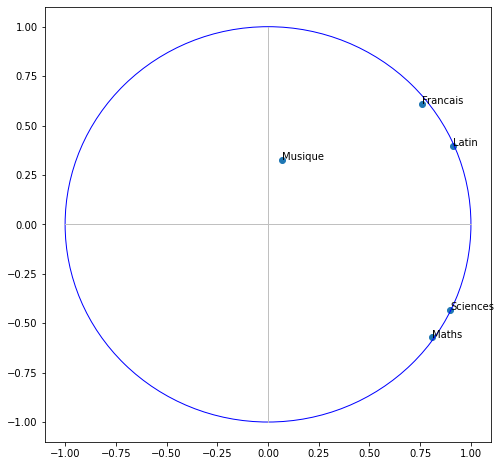

In [34]:
# Cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))

# les points
plt.scatter(corvar[:,0],corvar[:,1])

# affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

__Qualité de représentation des variables__


$COS_{jk}$ la qualité de représentation de la variable j dans l'axe $k$ est calculée comme suit :

$$COS_{jk}^{2}=r_{jk}^2$$

tel que $r_{jk}$ représente la corrélation de la variable $j$ avec l'axe $k$ (que nous avons récupéré dans la variable corvar).



In [35]:
# Qualité de représentation des variables - COS2
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


         id    COS2_1    COS2_2
0     Maths  0.649485  0.326450
1  Sciences  0.804627  0.185581
2  Francais  0.574697  0.373378
3     Latin  0.828562  0.157999
4   Musique  0.004447  0.107272


In [36]:
print(np.sum(cos2var,axis=0))
print(eigval)

[2.86181753e+00 1.15068113e+00 9.83140738e-01 3.93712053e-03
 4.23484620e-04]
[2.86181753e+00 1.15068113e+00 9.83140738e-01 3.93712053e-03
 4.23484620e-04]


__Contribution des variables aux axes__

$CTR_{jk}$ la contribution de l'individu $i$ à la construction de l'axe $k$ est calculée comme suit :

$$CTR_{jk}=\frac{r_{jk}^{2}}{\lambda_{k}}$$

tel que $r_{jk}$ représente la corrélation de la variable $j$ avec l'axe $k$ (que nous avons récupéré dans la variable corvar) et $\lambda_{k}$ represente la valeur propre associée à l'axe $k$.


In [37]:
# Contributions des variables aux axes 
ctrvar = corvar**2
for j in range(5):
  ctrvar[:,j]=ctrvar[:,j]/eigval[j]
print(pd.DataFrame({'id':df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

         id     CTR_1     CTR_2
0     Maths  0.226948  0.283702
1  Sciences  0.281159  0.161280
2  Francais  0.200815  0.324485
3     Latin  0.289523  0.137309
4   Musique  0.001554  0.093225


In [38]:
# Vérifions qu'en considérant toutes les variables à la fois la contribution à chaque axe est de 100 %
print(np.sum(ctrvar,axis=0))

[1. 1. 1. 1. 1.]


**Application: tracer le cercle de corrélation de l'axe 1 et 3, puis analyser.**

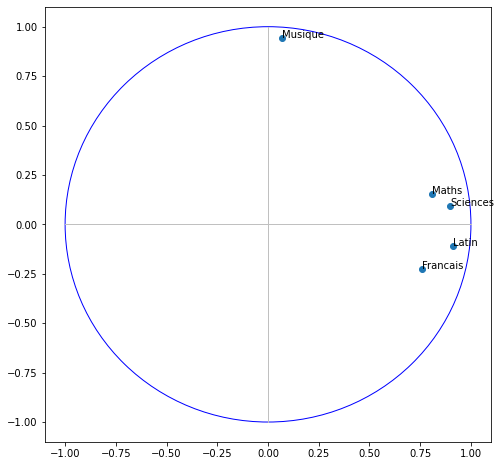

In [39]:
fig, axes = plt.subplots(figsize=(8,8))

# les points
plt.scatter(corvar[:,0],corvar[:,2])

# affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df.columns[j],(corvar[j,0],corvar[j,2]))

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

**Calculer et afficher les qualités de représentation des variables sur l'axe 1 er 3**

In [40]:
# Qualité de représentation des variables - COS2
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_3':cos2var[:,2]}))

         id    COS2_1    COS2_3
0     Maths  0.649485  0.023545
1  Sciences  0.804627  0.008621
2  Francais  0.574697  0.050945
3     Latin  0.828562  0.011756
4   Musique  0.004447  0.888274


**Calculer et afficher les contributions des variables aux axes 1 er 3**

In [41]:
# Contributions des variables aux axes 
ctrvar = corvar**2
for j in range(5):
  ctrvar[:,j]=ctrvar[:,j]/eigval[j]
print(pd.DataFrame({'id':df.columns,'CTR_1':ctrvar[:,0],'CTR_3':ctrvar[:,2]}))

         id     CTR_1     CTR_3
0     Maths  0.226948  0.023949
1  Sciences  0.281159  0.008769
2  Francais  0.200815  0.051818
3     Latin  0.289523  0.011957
4   Musique  0.001554  0.903507


In [42]:
# Vérifions qu'en considérant toutes les variables à la fois la contribution à chaque axe est de 100 %
print(np.sum(ctrvar,axis=0))

[1. 1. 1. 1. 1.]
